In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('Bass_BigTable.csv')
data.head(5)

,Price,Id,Size,Format,City,Impression,B01001001,B01001002,B01001003,B01001004,...,serviceRoad,trackRoad,footwayRoad,pathRoad,traffic_signals,aggr_residential_zone,aggr_commercial_zone,aggr_natural_zone,BFP_Count,BFP_Area
0,700,1,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,43,5,4,0,0,2,1,29,22,694.83
1,700,2,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,52,3,17,0,0,3,1,30,12,486.00
2,700,3,44.6,Stacked,Lacassine LA,68992,4641,2198,174,162,...,183,10,1,0,0,1,0,42,38,919.75
3,700,4,44.6,Individual,Baldwin LA,24379,1534,876,6,0,...,66,2,0,0,0,0,0,21,125,1430.83
4,825,6,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,43,5,4,0,0,2,1,29,22,694.83


In [10]:
x = data[['Size']]
y = data['Price']

model = LinearRegression()
model.fit(x, y)

coefficient = model.coef_[0]
intercept = model.intercept_

# Check if the price is biased with billboard size
if coefficient == 0:
    print("BIASED")
else:
    print("We are gooood, it is not biased")

We are gooood, it is not biased


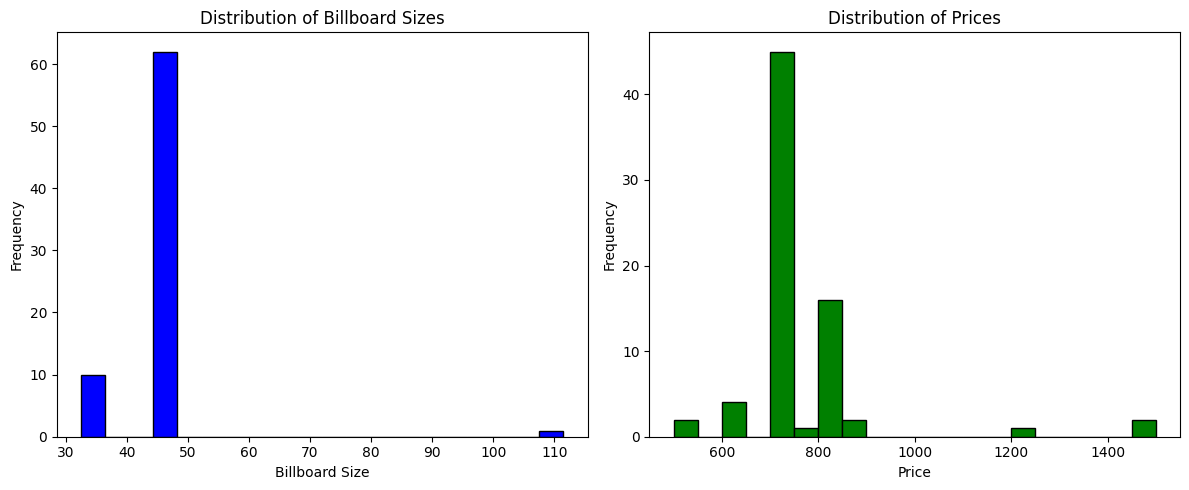

In [12]:
# Create a figure with two subplots
import matplotlib.pyplot as plt

billboard_size = data['Size']
price = data['Price']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram of billboard sizes
axs[0].hist(billboard_size, bins=20, color='blue', edgecolor='black')
axs[0].set_title('Distribution of Billboard Sizes')
axs[0].set_xlabel('Billboard Size')
axs[0].set_ylabel('Frequency')

# Plot the histogram of prices
axs[1].hist(price, bins=20, color='green', edgecolor='black')
axs[1].set_title('Distribution of Prices')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()









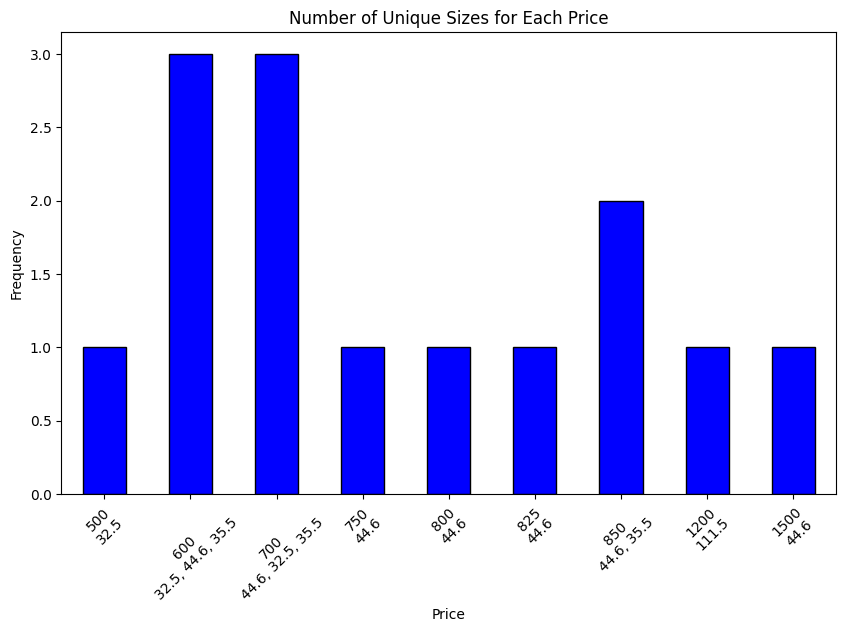

In [19]:

grouped_data = data.groupby('Price')['Size'].unique()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.apply(len).plot(kind='bar', color='blue', edgecolor='black')
ax.set_title('Number of Unique Sizes for Each Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add the billboard size to the x-axis
ax.set_xticklabels([f'{Price}\n{", ".join(map(str, Size))}' for Price, Size in grouped_data.items()], rotation=45)

# Display the plot
plt.show()


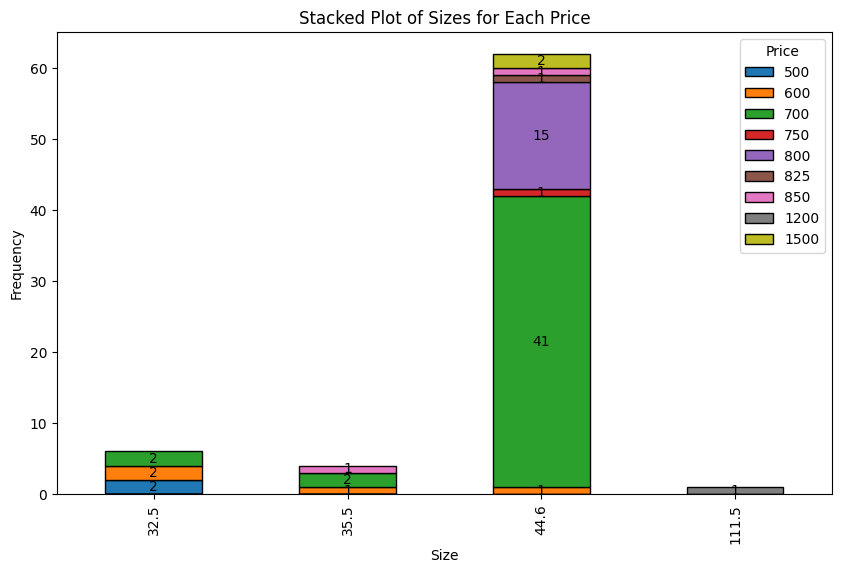

In [30]:

# Assuming your dataset has two columns: 'billboard_size' and 'price'
grouped_data = data.groupby('Price')['Size'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Stacked Plot of Sizes for Each Price')
ax.set_xlabel('Size')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()

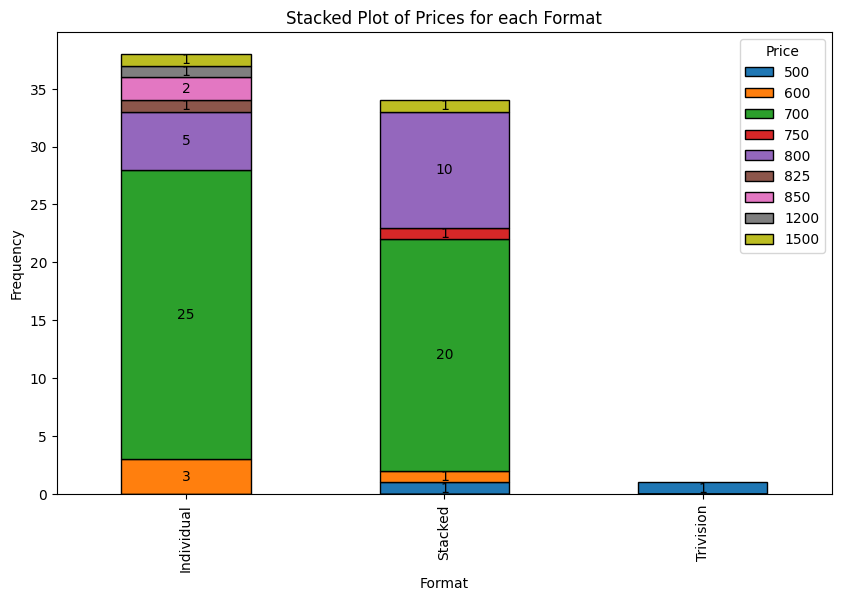

In [41]:
# Assuming your dataset has two columns: 'billboard_size' and 'price'
grouped_data = data.groupby('Price')['Format'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Stacked Plot of Prices for each Format')
ax.set_xlabel('Format')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()


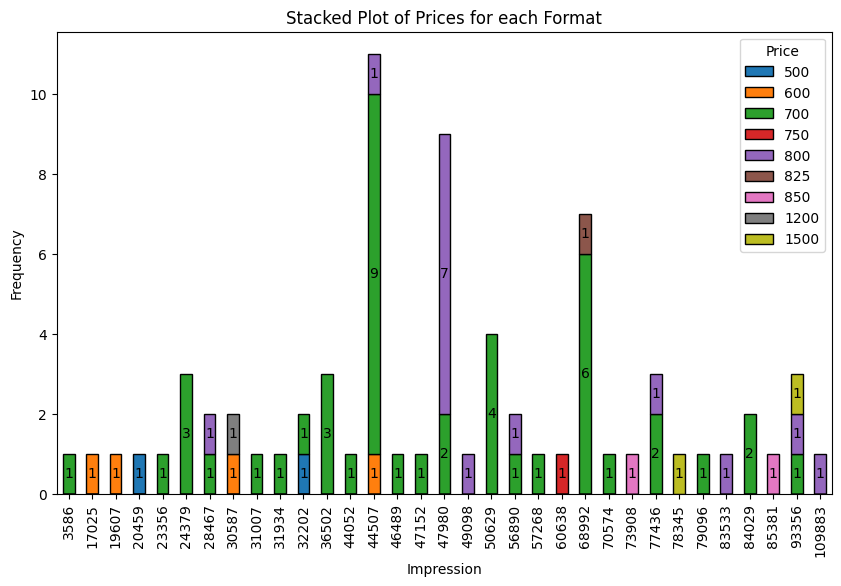

In [42]:
# Assuming your dataset has two columns: 'billboard_size' and 'price'
grouped_data = data.groupby('Price')['Impression'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.T.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
ax.set_title('Stacked Plot of Prices for each Format')
ax.set_xlabel('Impression')
ax.set_ylabel('Frequency')

# Add exact frequency values to each column
for i, col in enumerate(grouped_data.columns):
    total = 0
    for j, val in enumerate(grouped_data[col]):
        if val != 0:
            ax.text(i, total + val / 2, int(val), ha='center', va='center')
            total += val

# Display the plot
plt.show()